In [22]:
''' LDAP Logistic Regression
    Brihat Ratna Bajracharya
    19/075
    CDCSIT '''

' LDAP Logistic Regression\n    Brihat Ratna Bajracharya\n    19/075\n    CDCSIT '

In [23]:
# IMPORT HERE
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import time

In [24]:
# reading LDAP csv

df = pd.read_csv('LDAP.csv', delimiter=",", low_memory=False)

# df
# print(type(df))

In [25]:
df

,Unnamed: 0,Flow ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,13605,172.16.0.5-192.168.50.4-870-2908-17,172.16.0.5,870,192.168.50.4,2908,17,2018-11-03 10:09:00.565557,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
1,62631,172.16.0.5-192.168.50.4-871-53796-17,172.16.0.5,871,192.168.50.4,53796,17,2018-11-03 10:09:00.565559,48,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
2,143869,172.16.0.5-192.168.50.4-648-40660-17,172.16.0.5,648,192.168.50.4,40660,17,2018-11-03 10:09:00.565608,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
3,16171,172.16.0.5-192.168.50.4-872-54308-17,172.16.0.5,872,192.168.50.4,54308,17,2018-11-03 10:09:00.565993,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
4,80845,172.16.0.5-192.168.50.4-873-40653-17,172.16.0.5,873,192.168.50.4,40653,17,2018-11-03 10:09:00.565994,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113229,10532,172.16.0.5-192.168.50.4-610-9866-17,172.16.0.5,610,192.168.50.4,9866,17,2018-11-03 10:29:52.071524,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,LDAP
2113230,14986,172.16.0.5-192.168.50.4-611-2923-17,172.16.0.5,611,192.168.50.4,2923,17,2018-11-03 10:29:52.071734,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,LDAP
2113231,8232,172.16.0.5-192.168.50.4-612-1220-17,172.16.0.5,612,192.168.50.4,1220,17,2018-11-03 10:29:52.071977,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,LDAP
2113232,7392,172.16.0.5-192.168.50.4-613-12648-17,172.16.0.5,613,192.168.50.4,12648,17,2018-11-03 10:29:52.072224,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,LDAP


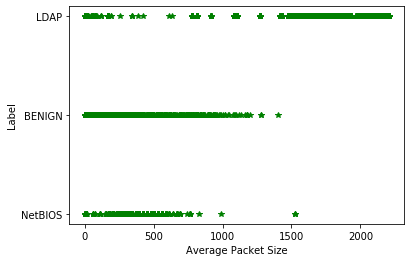

In [26]:
# Plotting Average Packet Size vs Label

avg_pkt_size = df[' Average Packet Size']
label = df[list(df.columns)[-1]]

plt.plot(avg_pkt_size, label, 'g*')
plt.xlabel('Average Packet Size')
plt.ylabel('Label')

plt.show()

In [27]:
# encoding non float data to float type for all columns

def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

data = handle_non_numerical_data(df)

# print(type(data))

# print(data)

In [28]:
data

,Unnamed: 0,Flow ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,13605,262785,44,870,63,2908,17,1712130,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,1,0
1,62631,1211728,44,871,63,53796,17,952103,48,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,1,0
2,143869,405261,44,648,63,40660,17,1406854,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,1,0
3,16171,679869,44,872,63,54308,17,1905046,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,1,0
4,80845,708178,44,873,63,40653,17,976925,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113229,10532,1853651,44,610,63,9866,17,283041,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,1,1
2113230,14986,1585590,44,611,63,2923,17,10477,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,1,1
2113231,8232,883407,44,612,63,1220,17,90018,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,1,1
2113232,7392,999270,44,613,63,12648,17,2085172,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,1,1


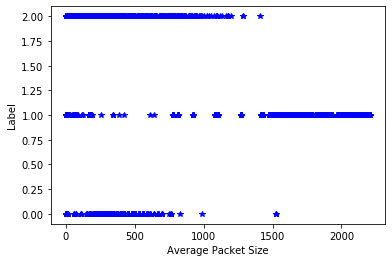

In [29]:
# Plotting Average Packet Size vs Label after encoding

avg_pkt_size = data[' Average Packet Size']
label = data[list(data.columns)[-1]]

plt.plot(avg_pkt_size, label, 'b*')
plt.xlabel('Average Packet Size')
plt.ylabel('Label')

plt.show()

In [30]:
# correlation test among feature columns with label column

corr = data.corr()
print(corr[' Label'])

labelcorr = corr[' Label'].sort_values()
corr_dict = dict(labelcorr)
print(corr_dict)

Unnamed: 0       -0.752472
Flow ID           0.001423
Source_IP         0.166270
Source_Port       0.144058
Destination_IP    0.132561
                    ...   
 Idle Max         0.046076
 Idle Min         0.045140
SimillarHTTP      0.014569
 Inbound         -0.149457
 Label            1.000000
Name:  Label, Length: 88, dtype: float64
{'Unnamed: 0': -0.752472339596548, 'Protocol': -0.15101837887241756, ' Inbound': -0.14945687840206262, ' min_seg_size_forward': -0.05637313458482986, ' Fwd Header Length': -0.05629353491866543, ' Fwd Header Length.1': -0.05629353491866543, 'Destination_Port': -0.012102190951823352, ' Bwd Header Length': -0.00633967032746798, ' Flow IAT Min': -0.00038015630691547164, ' Fwd IAT Min': -0.0003799509082320197, 'Timestamp': -0.00018127588100869682, 'Flow ID': 0.0014231120955229765, 'Subflow Fwd Packets': 0.001739651723000271, ' Total Fwd Packets': 0.001739651723000271, ' SYN Flag Count': 0.006137158510695141, ' Subflow Bwd Bytes': 0.009506477124606833, ' Total

In [31]:
# choose highly correlated column among all columns
feature_dict = dict((k, v) for k, v in corr_dict.items() if np.absolute(v) > 0.9)
print(feature_dict)

{' Min Packet Length': 0.9276131094369818, ' Fwd Packet Length Min': 0.9277359022458002, ' Avg Fwd Segment Size': 0.9291694741755031, ' Fwd Packet Length Mean': 0.9291694741755031, ' Average Packet Size': 0.9292312255418383, ' Packet Length Mean': 0.9302060576330425, ' Fwd Packet Length Max': 0.9327888918318388, ' Max Packet Length': 0.9359158567754134, ' Label': 1.0}


In [42]:
# choose highly correlated column among all columns
feature_dict_n = dict((k, v) for k, v in corr_dict.items() if v > 0.9)
print(feature_dict_n)

{' Min Packet Length': 0.9276131094369818, ' Fwd Packet Length Min': 0.9277359022458002, ' Avg Fwd Segment Size': 0.9291694741755031, ' Fwd Packet Length Mean': 0.9291694741755031, ' Average Packet Size': 0.9292312255418383, ' Packet Length Mean': 0.9302060576330425, ' Fwd Packet Length Max': 0.9327888918318388, ' Max Packet Length': 0.9359158567754134, ' Label': 1.0}


In [32]:
# less correlated features

feature_dict_2 = dict((k, np.absolute(v)) for k, v in corr_dict.items() if np.absolute(v) < 0.7)
print(feature_dict_2)

{'Protocol': 0.15101837887241756, ' Inbound': 0.14945687840206262, ' min_seg_size_forward': 0.05637313458482986, ' Fwd Header Length': 0.05629353491866543, ' Fwd Header Length.1': 0.05629353491866543, 'Destination_Port': 0.012102190951823352, ' Bwd Header Length': 0.00633967032746798, ' Flow IAT Min': 0.00038015630691547164, ' Fwd IAT Min': 0.0003799509082320197, 'Timestamp': 0.00018127588100869682, 'Flow ID': 0.0014231120955229765, 'Subflow Fwd Packets': 0.001739651723000271, ' Total Fwd Packets': 0.001739651723000271, ' SYN Flag Count': 0.006137158510695141, ' Subflow Bwd Bytes': 0.009506477124606833, ' Total Length of Bwd Packets': 0.009506477124606833, 'SimillarHTTP': 0.014568932109410395, ' Flow Packets/s': 0.015128613909724179, ' act_data_pkt_fwd': 0.015710267142736815, ' Bwd Packets/s': 0.01662210466154632, ' Active Std': 0.01713683548092619, ' Idle Std': 0.01747941946361086, ' Total Backward Packets': 0.020743855027040226, ' Subflow Bwd Packets': 0.020743855027040226, ' Active 

In [33]:
# omit last label column
selected_columns = list(feature_dict)[:-1]
print(selected_columns)

[' Min Packet Length', ' Fwd Packet Length Min', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', ' Average Packet Size', ' Packet Length Mean', ' Fwd Packet Length Max', ' Max Packet Length']


In [34]:
# split encoded dataset into train and test 4:1

X = data[selected_columns]
# print(X)
y = data[list(data.columns)[-1]]
# print(y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [35]:
# logistic regression analysis

start = time.time()

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver="lbfgs", multi_class="multinomial", max_iter=1000)

# fit the model with data
logreg.fit(X_train,y_train)

# predict y using logreg trained model
y_pred=logreg.predict(X_test)

end = time.time()
print(end - start)

896.7111434936523


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [36]:
logreg.coef_

array([[ 0.22382732, -0.08998051,  0.06499469,  0.06499469,  0.02741323,
        -0.29035698, -0.01600362,  0.01269662],
       [ 0.00529562,  0.00273235,  0.02760616,  0.02760616,  0.04369568,
        -0.09076561, -0.0182116 ,  0.00792533],
       [-0.22912294,  0.08724816, -0.09260085, -0.09260085, -0.07110892,
         0.38112259,  0.03421522, -0.02062195]])

In [37]:
# calculate confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 40488,      2,     14],
       [   152, 380867,     50],
       [    29,      1,   1044]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

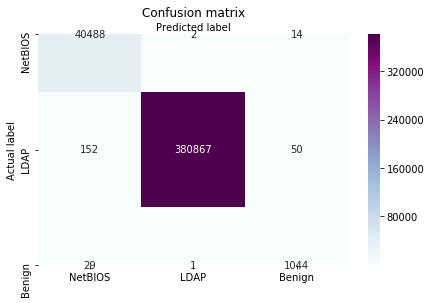

In [38]:
# plot confusion matrix for LDAP
fig, ax = plt.subplots()

# create heatmap
x_axis_labels = ['NetBIOS','LDAP','Benign'] # labels for x-axis
y_axis_labels = ['NetBIOS','LDAP','Benign'] # labels for y-axis
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BuPu", fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
# calculate and print performance metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average="macro"))
print("Recall:",metrics.recall_score(y_test, y_pred,average="macro"))
print("F1 Score:",metrics.f1_score(y_test, y_pred,average="macro"))

Accuracy: 0.9994132219085904
Precision: 0.9792599420442646
Recall: 0.9903806428884815
F1 Score: 0.984741430294035


In [40]:
''' COMPLETE '''

' COMPLETE '

In [16]:
# without feature selection (split data set 4:1)

X_wo = data[list(data.columns)[:-1]]
# print(X_wo)
y_wo = data[list(data.columns)[-1]]
# print(y_wo)
X_train_wo,X_test_wo,y_train_wo,y_test_wo=train_test_split(X_wo,y_wo,test_size=0.2,random_state=0)

In [17]:
# without feature selection (logistic regression wo)
start_wo = time.time()

logreg_wo = LogisticRegression(solver="lbfgs", multi_class="multinomial", max_iter=200)

# fit the model with data
logreg_wo.fit(X_train_wo,y_train_wo)

# predict y using logreg trained model
y_pred_wo=logreg_wo.predict(X_test_wo)

end_wo = time.time()
print(end_wo - start_wo)

KeyboardInterrupt: 

In [ ]:
# calculate confusion matrix wo

cnf_matrix_wo = metrics.confusion_matrix(y_test_wo, y_pred_wo)
cnf_matrix_wo

In [ ]:
# plot confusion matrix wo

fig, ax = plt.subplots()

# create heatmap
x_axis_labels = ['LDAP','Benign','NetBIOS'] # labels for x-axis
y_axis_labels = ['LDAP','Benign','NetBIOS'] # labels for y-axis

sns.heatmap(pd.DataFrame(cnf_matrix_wo), annot=True, cmap="BuPu", fmt='g', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# calculate performance metrics wo

print("Accuracy:",metrics.accuracy_score(y_test_wo, y_pred_wo))
print("Precision:",metrics.precision_score(y_test_wo, y_pred_wo,average="micro"))
print("Recall:",metrics.recall_score(y_test_wo, y_pred_wo,average="micro"))
print("F1 Score:",metrics.f1_score(y_test_wo, y_pred_wo,average="micro"))

In [ ]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('LDAP Correlation Heatmap', fontsize=14)